In [6]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import random
from collections import defaultdict

# First-visit Monte Carlo 

In [31]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 4
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 8000

In [32]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = defaultdict(list)
# returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = defaultdict(list)
# deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [(i, j) for i in range(gridSize) for j in range(gridSize)]

In [33]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [41]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.mean(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

In [42]:
V

array([[ 0.        , -1.64589218, -2.21946176, -2.38787493],
       [-1.63971057, -2.10616771, -2.27674308, -2.23145186],
       [-2.21174108, -2.27986338, -2.09105698, -1.63932424],
       [-2.38113019, -2.22306338, -1.61032575,  0.        ]])

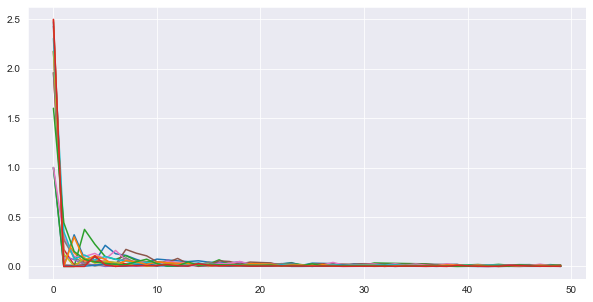

In [43]:
# using gamma = 1
plt.figure(figsize=(10, 5))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)

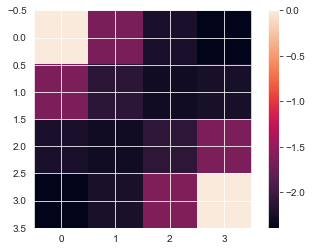

In [44]:
plt.imshow(V)
plt.colorbar()

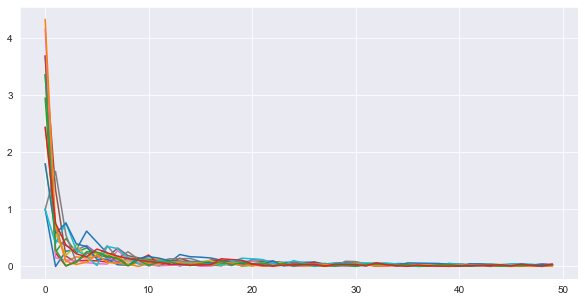

In [27]:
# using gamma = 0.6
plt.figure(figsize=(10, 5))
all_series = [list(x)[:50] for x in deltas.values()]
for series in all_series:
    plt.plot(series)